SVM from scratch Filip Widera



## Terminologia

**Threshold (próg)**  
Wartość graniczna, przy której decydujemy np. o przypisaniu obserwacji do klasy (np. w regresji logistycznej).

**Bias (błąd uprzedzenia)**  
Systematyczne odchylenie predykcji modelu od prawdziwej zależności (zbyt proste założenia → underfitting).

**Variance (wariancja)**  
Wrażliwość modelu na losowe zmiany w zestawie treningowym (duża elastyczność → overfitting).

**Bias–Variance Tradeoff**  
Kompromis między bias a variance: zwiększanie złożoności modelu zmniejsza bias, ale zwiększa variance, i odwrotnie.

---

### Terminologia SVM

**Support vectors (wektory nośne)**  
Przykłady z treningu leżące najbliżej hiperpłaszczyzny decyzyjnej; to one determinują położenie tej granicy.

**Margin (margines)**  
Odległość między hiperpłaszczyzną a najbliższymi wektorami nośnymi; SVM maksymalizuje ten margines.

**Hyperplane (hiperpłaszczyzna)**  
Linia (2D), płaszczyzna (3D) lub ogólnie podprzestrzeń rozdzielająca klasy w przestrzeni cech.

**Kernel (jądro)**  
Funkcja $K(x_i, x_j)$ pozwalająca SVM operować w przestrzeni wyższych wymiarów (np. RBF, wielomianowe) bez jawnego obliczania rzutowania.

**Slack variables (zmienne miękkości)**  
Dodatkowe zmienne pozwalające części punktów naruszyć margines, wprowadzane przy niemiękkim SVM (C-regularization).
"""

display(Markdown(terminology))



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import files

In [ ]:
uplouded = files.upload()

Saving breast-cancer (3).csv to breast-cancer (3).csv


In [ ]:
df = pd.read_csv('breast-cancer (3).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
px.pie(df,'diagnosis', color = 'diagnosis', template = 'plotly_dark')

In [ ]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [ ]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [ ]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [ ]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


<a id="3"></a>
<h1 style='background:#000000;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #17E8C4;'>Data Preprocessing</center></h1>

# Data Preprocessing

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
corr = df.corr()

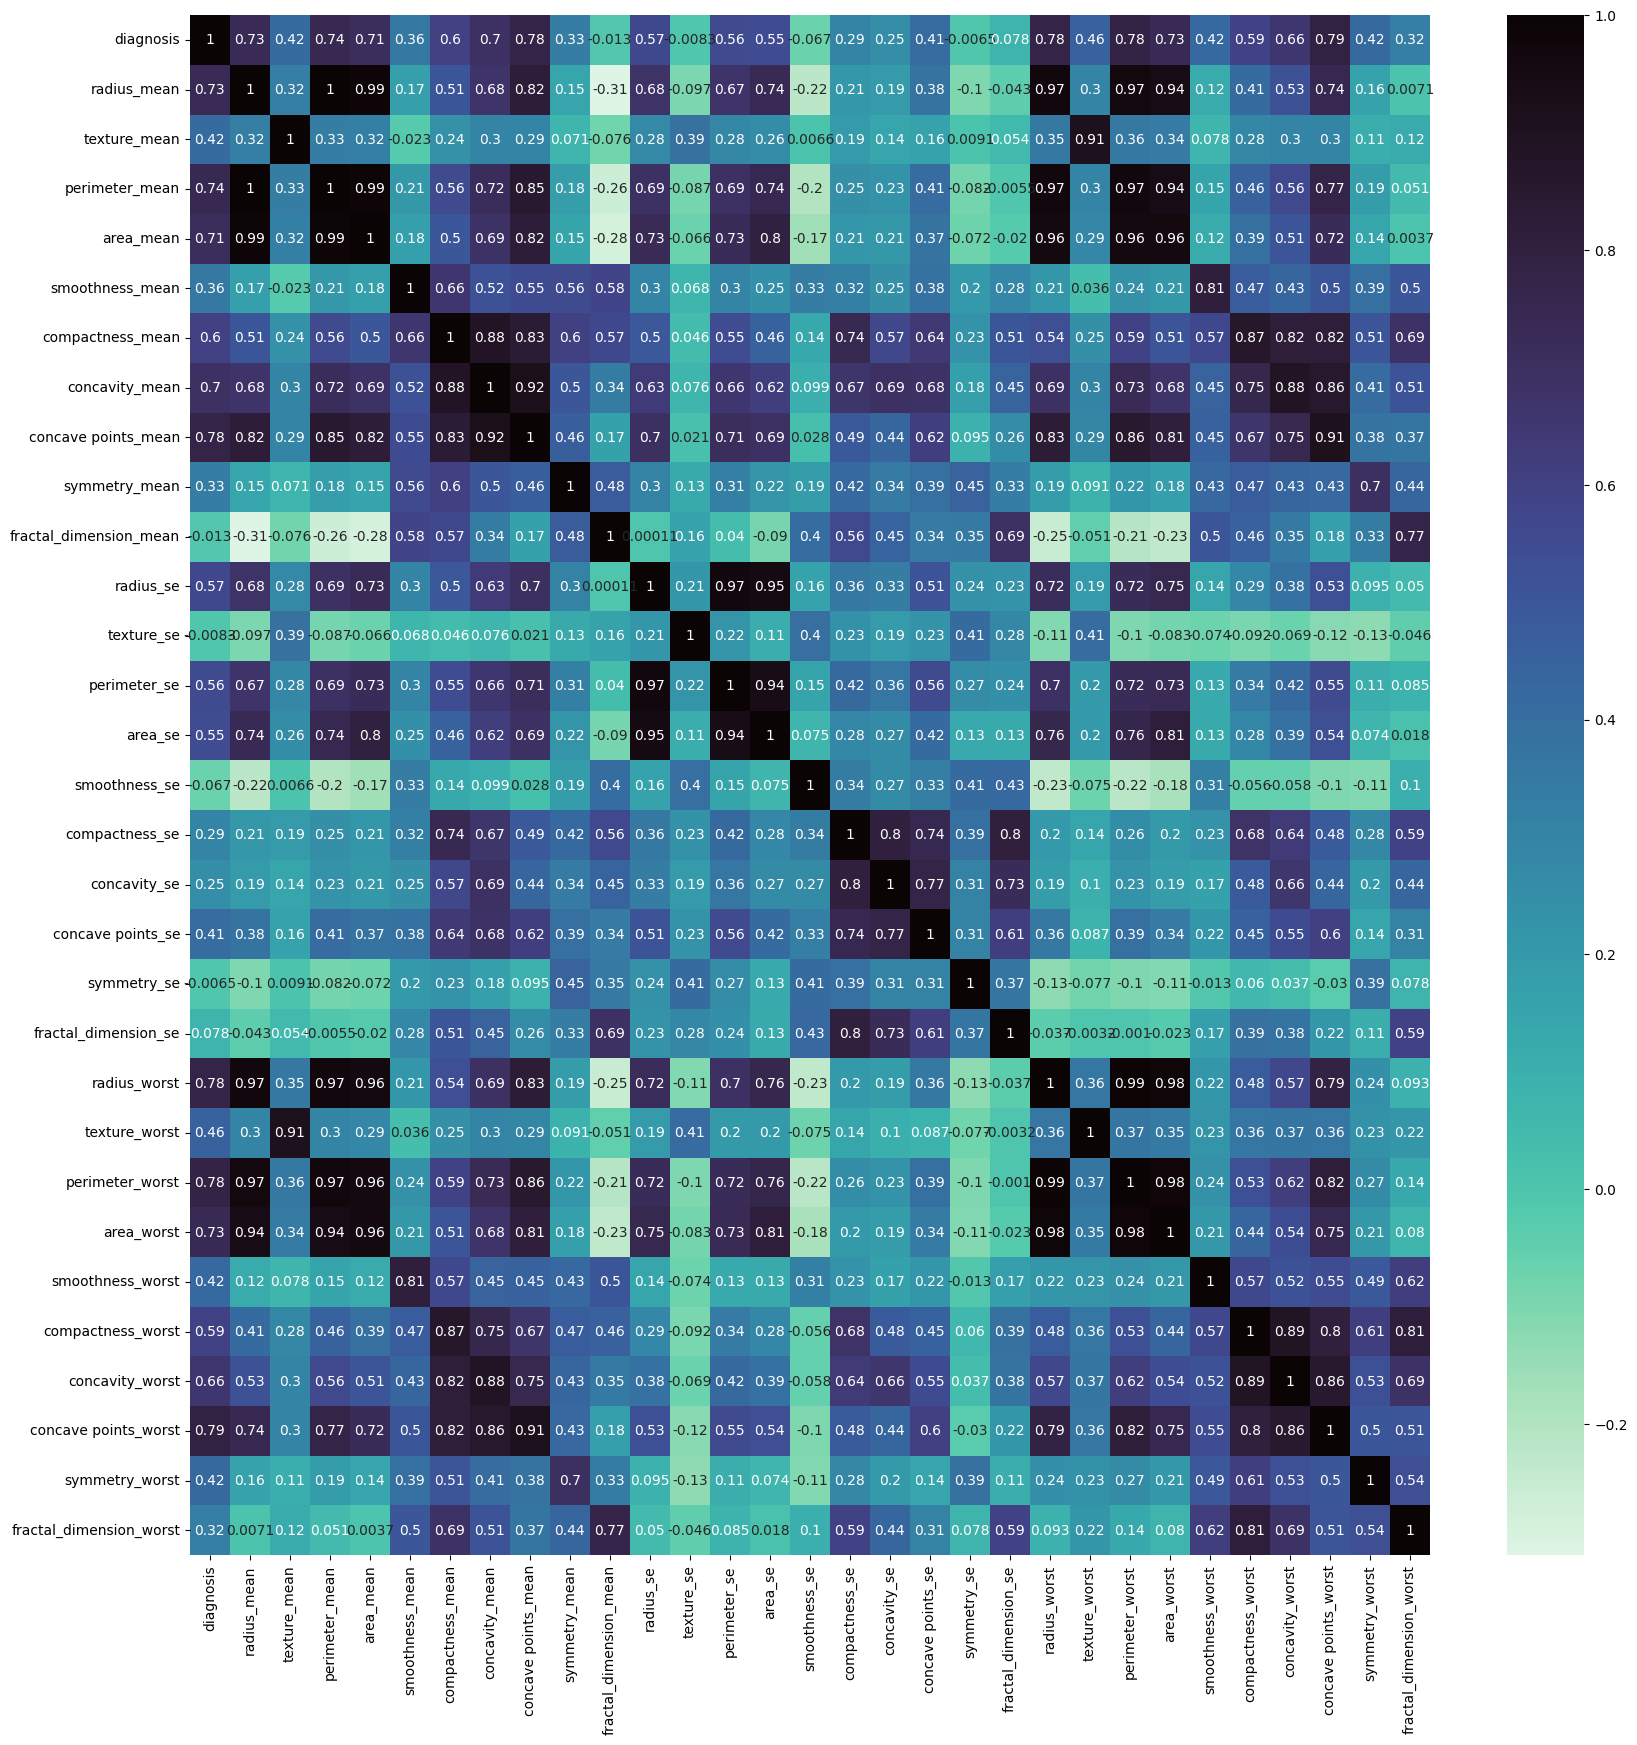

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [ ]:
target_corr = abs(corr)
features = target_corr[target_corr > 0.2]
names = [index for index, value in features.items()]
names.remove('diagnosis')
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
X = df[names].values
y = df['diagnosis'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
print('X shape: ' ,X.shape)
print('y shape: ',y.shape)

X shape:  (569, 30)
y shape:  (569,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
class SVM:
    """
    A Support Vector Machine (SVM) implementation using gradient descent.

    Parameters:
    -----------
    iterations : int, default=1000
        The number of iterations for gradient descent.
    lr : float, default=0.01
        The learning rate for gradient descent.
    lambdaa : float, default=0.01
        The regularization parameter.

    Attributes:
    -----------
    lambdaa : float
        The regularization parameter.
    iterations : int
        The number of iterations for gradient descent.
    lr : float
        The learning rate for gradient descent.
    w : numpy array
        The weights.
    b : float
        The bias.

    Methods:
    --------
    initialize_parameters(X)
        Initializes the weights and bias.
    gradient_descent(X, y)
        Updates the weights and bias using gradient descent.
    update_parameters(dw, db)
        Updates the weights and bias.
    fit(X, y)
        Fits the SVM to the data.
    predict(X)
        Predicts the labels for the given data.

    """

    def __init__(self, iterations = 1000, lr = 0.01, lambdaa = 0.01):
        """
        Initializes the SVM model.

        Parameters:
        -----------
        iterations : int, default=1000
            The number of iterations for gradient descent.
        lr : float, default=0.01
            The learning rate for gradient descent.
        lambdaa : float, default=0.01
            The regularization parameter.
        """
        self.iterations = iterations
        self.lambdaa = lambdaa
        self.lr = lr
        self.w = None
        self.b = None
    def initialize_parameters(self, X):
        """
        Initializes the weights and bias.

        Parameters:
        -----------
        X : numpy array
            The input data.
        """
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

    def update_parameters(self, dw, db):
        """
        Updates the weights and bias.

        Parameters:
        -----------
        dw : numpy array
            The change in weights.
        db : float
            The change in bias.
        """
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
    def margin(self,X,y):
        """
        define which gradient equations we use

        Parameters:
        __________
        x-single record numpy array
        """
        return y * (np.dot(X,self.w) - self.b) >= 1

    def stochastic_gradient_descent(self,X,y):
        """
        Updates the weights and bias using gradient descent.

        Parameters:
        -----------
        X : numpy array
            The input data.
        y : numpy array
            The target values.
        """
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]
            self.update_parameters(dw, db)
    def fit(self,X,y):
        """
        Fits the SVM to the data.

        Parameters:
        -----------
        X : numpy array
            The input data.
        y : numpy array
            The target values.
        """
        self.initialize_parameters(X)
        for i in range(self.iterations):
          self.stochastic_gradient_descent(X,y)
    def predict(self, X):
        """
        Predicts the class labels for the test data.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        Returns
        -------
        y_pred : array-like, shape (n_samples,)
            The predicted class labels.

        """
        output = np.dot(X,self.w) - self.b
        klasa = np.sign(output)
        predictions = np.where(klasa <= -1, 0, 1)
        return predictions







In [ ]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [ ]:
model = SVM()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy(y_test, predictions)

np.float64(0.9824561403508771)